In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
#importing dataset
dataset = pd.read_csv('Position_Salaries.csv')

In [3]:
dataset.head(n=10)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


<AxesSubplot:>

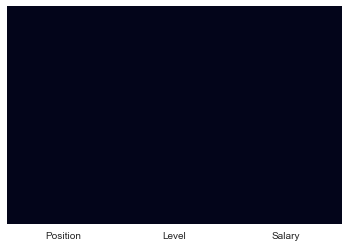

In [5]:
#By using heat map, we can see the null values in dataset visually(we can check that do we have any null values or not)
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False)

In [6]:
#By running this code we can see the number of null values in each column
dataset.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

Note:
because for each position we have a significant level instit of position we will consider level.
so we have 2 columns , one dependent variable (Salary) and one independent variable (Level)

In [7]:
#defining X and Y
X = dataset.iloc[:,1:-1].values
Y = dataset.iloc[:,-1].values

In [8]:
#training the linear regression model on the whole dataset
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X,Y)

LinearRegression()

In [9]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
linear_regressor_2 = LinearRegression()
linear_regressor_2.fit(X_poly,Y)

LinearRegression()

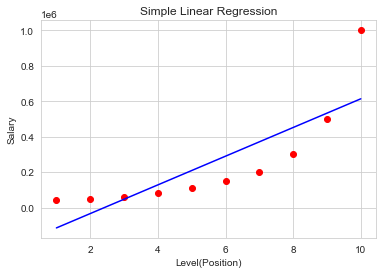

In [10]:
#visulaizing the linear regreesion
plt.scatter(X,Y,color = 'red')
plt.plot(X,linear_regressor.predict(X),color = 'blue')
plt.title('Simple Linear Regression')
plt.xlabel('Level(Position)')
plt.ylabel('Salary')
plt.show()

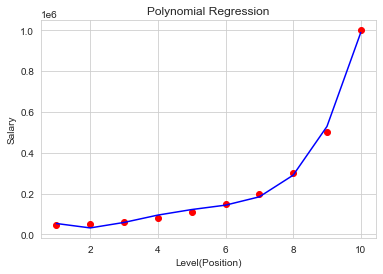

In [11]:
#visulaizing the polynomial regreesion
plt.scatter(X,Y,color = 'red')
plt.plot(X,linear_regressor_2.predict(poly_reg.fit_transform(X)),color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Level(Position)')
plt.ylabel('Salary')
plt.show()

In [12]:
#predicting a new result with linear regression
sal_predict = linear_regressor.predict([[6.5]])
print(sal_predict)

[330378.78787879]


In [13]:
#predicting a new result with linear regression
sal_predict_2 = linear_regressor_2.predict(poly_reg.fit_transform([[6.5]]))
print(sal_predict)

[330378.78787879]
